## Imports

In [1]:
import numpy as np
import time

# Importing standard Qiskit libraries
import qiskit

from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Tomography functions
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector

from qiskit import QuantumRegister, ClassicalRegister 
from numpy import pi

from qiskit import execute
from qiskit.providers.aer.library import save_statevector

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info.states import partial_trace
import math
import pickle

from scipy.linalg import lu
from numpy import linalg as LA

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## Circuit creation

In [2]:

qreg_q = QuantumRegister(10, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.h(qreg_q[7])
circuit.h(qreg_q[8])
circuit.h(qreg_q[9])
circuit.cz(qreg_q[0], qreg_q[9])
circuit.cz(qreg_q[2], qreg_q[7])
circuit.cz(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[1], qreg_q[6])

circuit.cz(qreg_q[6], qreg_q[7])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[7], qreg_q[8])
circuit.cz(qreg_q[3], qreg_q[8])
circuit.cz(qreg_q[8], qreg_q[9])
circuit.cz(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[7])
circuit.cz(qreg_q[4], qreg_q[9])
circuit.cz(qreg_q[4], qreg_q[5])
circuit.h(qreg_q[8])
circuit.cz(qreg_q[5], qreg_q[6])
circuit.cz(qreg_q[0], qreg_q[5])
circuit.h(qreg_q[6])
circuit.h(qreg_q[5])

#print(qiskit.quantum_info.Statevector.from_instruction(circuit))

circuit.measure(qreg_q[4], creg_c[0])
circuit.measure(qreg_q[5], creg_c[1])
circuit.measure(qreg_q[6], creg_c[2])
circuit.measure(qreg_q[7], creg_c[3])
circuit.measure(qreg_q[8], creg_c[4])
circuit.measure(qreg_q[9], creg_c[5])

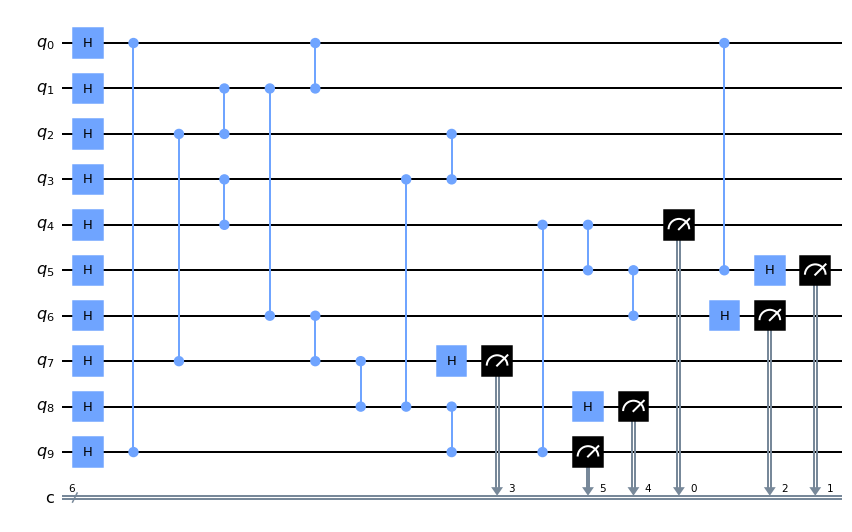

In [3]:
circuit.draw('mpl')

## EPR 0,1 and 2,3

In [ ]:
qreg_q = QuantumRegister(10, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.h(qreg_q[7])
circuit.h(qreg_q[8])
circuit.h(qreg_q[9])
circuit.cz(qreg_q[0], qreg_q[9])
circuit.cz(qreg_q[2], qreg_q[7])
circuit.cz(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[1], qreg_q[6])
circuit.cz(qreg_q[6], qreg_q[7])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[7], qreg_q[8])
circuit.cz(qreg_q[3], qreg_q[8])
circuit.cz(qreg_q[8], qreg_q[9])
circuit.cz(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[7])
circuit.cz(qreg_q[4], qreg_q[9])
circuit.cz(qreg_q[4], qreg_q[5])
circuit.cz(qreg_q[5], qreg_q[6])

circuit.cz(qreg_q[0], qreg_q[5])
circuit.h(qreg_q[6])


# circuit.measure(qreg_q[0], creg_c[0])
# circuit.measure(qreg_q[1], creg_c[1])
# circuit.measure(qreg_q[2], creg_c[2])
# circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[0])
circuit.measure(qreg_q[5], creg_c[1])
circuit.measure(qreg_q[6], creg_c[2])
circuit.measure(qreg_q[7], creg_c[3])
circuit.measure(qreg_q[8], creg_c[4])
circuit.measure(qreg_q[9], creg_c[5])

## EPR 0,2 and 1,3

In [ ]:

qreg_q = QuantumRegister(10, 'q')
creg_c = ClassicalRegister(10, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.h(qreg_q[7])
circuit.h(qreg_q[8])
circuit.h(qreg_q[9])
circuit.cz(qreg_q[0], qreg_q[9])
circuit.cz(qreg_q[2], qreg_q[7])
circuit.cz(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[1], qreg_q[6])
circuit.cz(qreg_q[6], qreg_q[7])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[7], qreg_q[8])
circuit.cz(qreg_q[3], qreg_q[8])
circuit.cz(qreg_q[8], qreg_q[9])
circuit.cz(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[7])
circuit.cz(qreg_q[4], qreg_q[9])
circuit.h(qreg_q[8])
circuit.sdg(qreg_q[7])
circuit.cz(qreg_q[4], qreg_q[5])
circuit.h(qreg_q[9])
circuit.h(qreg_q[7])
circuit.sdg(qreg_q[9])
circuit.cz(qreg_q[5], qreg_q[6])
circuit.h(qreg_q[9])
circuit.cz(qreg_q[0], qreg_q[5])
circuit.h(qreg_q[6])
circuit.sdg(qreg_q[6])
circuit.h(qreg_q[6])


circuit.measure(qreg_q[4], creg_c[0])
circuit.measure(qreg_q[5], creg_c[1])
circuit.measure(qreg_q[6], creg_c[2])
circuit.measure(qreg_q[7], creg_c[3])
circuit.measure(qreg_q[8], creg_c[4])
circuit.measure(qreg_q[9], creg_c[5])

## Run on simulator

In [4]:
num_shots = 6400
backend = Aer.get_backend("aer_simulator")
circuit.save_statevector(label = '0-3-1-2', pershot = True)

#result = backend.run(qc2, shots=10, memory=True).result()

result = execute(circuit, backend = backend, shots = 6400,  memory=True).result()
memory = result.get_memory(circuit)

/Users/yash/Library/Python/3.8/lib/python/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/yash/Library/Python/3.8/lib/python/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [5]:
def run_on_simulator(circuit, label):
    num_shots = 6400
    backend = Aer.get_backend("aer_simulator")
    #circuit.save_statevector(label = '0-3-1-2', pershot = True)
    circuit.save_statevector(label, pershot = True)

    result = execute(circuit, backend = backend, shots = 6400,  memory=True).result()
    memory = result.get_memory(circuit)

# Check if statevector in simulator is product of EPR states

In [6]:
def trace_out(state_vec):
    traced_over = list(range(0, 10))

    traced_over.remove(0)
    traced_over.remove(1)
    traced_over.remove(2)
    traced_over.remove(3)

    rho = DensityMatrix(state_vec)
    rho_0_1_2_3 = partial_trace(rho, traced_over)

    traced_over = list(range(0, 4))
    traced_over.remove(1)
    traced_over.remove(2)

    rho_1_2 = partial_trace(rho_0_1_2_3, traced_over)
    
    traced_over = list(range(0, 4))
    traced_over.remove(0)
    traced_over.remove(3)

    rho_0_3 = partial_trace(rho_0_1_2_3, traced_over)

    traced_over = list(range(0, 2))
    traced_over.remove(1)
    rho_0 = partial_trace(rho_0_3, traced_over)

    traced_over = list(range(0, 2))
    traced_over.remove(1)
    rho_1 = partial_trace(rho_1_2, traced_over)
    
    if not math.isclose(rho_0.purity(), 1) and not math.isclose(rho_1.purity(), 1):
        print("Bell pair generated")
        # print(rho_0.purity())
        # print(rho_1.purity())
        return True
    

In [6]:
def check_epr_pairs(circuit_label):
    num_shots = 6400

    indices = []
    state_vecs = []
    bell_pairs = 0
    for i in range(num_shots):
        #state_vec = result.data(0)['0-3-1-2'][i]
        state_vec = result.data(0)[circuit_label][i]

        state_vecs.append(state_vec)
        
        print(i)

        is_bell_pair_generated = trace_out(state_vec)
        if is_bell_pair_generated:
            bell_pairs += 1
        
    print("Bell pairs = ", bell_pairs)
check_epr_pairs()

# Tomography for a category

In [7]:
def save_to_file(results_map, file_name):
  with open(file_name +'.pkl', 'wb') as handle:
    pickle.dump(results_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

def read_from_file(file_name):
  with open(file_name + '.pkl', 'rb') as handle:
    results_map = pickle.load(handle)
    print("This is good")
    return results_map

def tomography(state):
    qst_exp = StateTomography(state, measurement_qubits = [0,1,2,3])
    qst_data = qst_exp.run(backend, seed_simulation=100).block_for_results()
    return qst_data

def categorical_tomography():
    stats_by_category = {}
    memory = result.get_memory(circuit)

    finished = 0
    for i in range(6400):
        print("i = ", i)
        category = memory[i]
        category = category[::-1]

        if stats_by_category.get(category) is None:
            stats_by_category[category] = list()
            reconstructed_state = tomography(result.data(0)['0-3-1-2'][i])
            #get the category of this state
            #remember the category is right to left
            #Lets reverse it right here

            stats_by_category[category].append(reconstructed_state)
            print('Finished = ', finished)
            finished += 1

    #save to file
    save_to_file(stats_by_category, 'tomography_stats')
    return stats_by_category

def post_selected_tomography():
    finished_categories = ["000101", "000110", "001001", "010011", "011000", "011001", "011101", "011110","101001", "101010"]
    stats_by_category = {}
    memory = result.get_memory(circuit)

    finished = 0
    #iterate over all 6400 shots
    for i in range(6400):
        print("i = ", i)
        #get category of current shot
        category = memory[i]
        #qiskit endian-ness is right to left. 0th qubit is rightmost
        category = category[::-1]

        print('Category = ', category)

        if category not in finished_categories and stats_by_category.get(category) is None:
            stats_by_category[category] = list()

            reconstructed_state = tomography(result.data(0)['0-3-1-2'][i])
            stats_by_category[category].append(reconstructed_state)
            print('Finished = ', finished)
            finished += 1

            #save to file

            save_to_file(stats_by_category[category],  category + '_' +  str(i))

    return stats_by_category

In [8]:
post_selected_tomography()

Finished =  14
i =  19
Category =  110010


## Get pure states from density matrix by decomposition

In [39]:
def lu_decomp_of_dm(stats, category):
    stats_by_measurement_category = {}
    columns = []
    for s in stats[category]:
        density_matrix = s.analysis_results("state").value

        p,l,u = lu(np.array(density_matrix))

def eigen_decomp_of_dm(stats, category):
    stats_by_measurement_category = {}
    columns = []
    for s in stats[category]:
        density_matrix = s.analysis_results("state").value
        
        val, vec = LA.eigh(np.array(density_matrix))
        
        max_prob_state_index = np.argmax(val)
        pure_state = vec[:, max_prob_state_index]
        
        return pure_state

   
def category_stats(stats, category):
    stats_by_measurement_category = {}
    columns = []
    for s in stats[category]:
        measurement, state = s.analysis_results("state").value.measure()

        measurement = measurement[::-1]
        if stats_by_measurement_category.get(measurement) is None:
            stats_by_measurement_category[measurement] = 1

            if measurement not in columns:
                columns.append(measurement)

        stats_by_measurement_category[measurement] += 1

    columns = np.sort(columns)
    return stats_by_measurement_category

## Check if state reconstucted from tomography is product of Bell pairs

In [ ]:
def trace_out_reconstructed_state(state_vec):

    traced_over = list(range(0, 4))
    traced_over.remove(1)
    traced_over.remove(2)

    rho_0_3 = partial_trace(DensityMatrix(reconstructed_state), traced_over)
    
    traced_over = list(range(0, 4))
    traced_over.remove(0)
    traced_over.remove(3)

    rho_1_2 = partial_trace(DensityMatrix(reconstructed_state), traced_over)

    traced_over = list(range(0, 2))
    traced_over.remove(1)
    rho_0 = partial_trace(rho_0_3, traced_over)

    traced_over = list(range(0, 2))
    traced_over.remove(1)
    rho_1 = partial_trace(rho_1_2, traced_over)
    
    if not math.isclose(rho_0.purity(), 1) and not math.isclose(rho_1.purity(), 1):
        print("Bell pair generated")
        # print(rho_0.purity())
        # print(rho_1.purity())
        return True

stats = read_from_file('000000_tomography_stats')
reconstructed_state = eigen_decomp_of_dm(stats, '000000')
trace_out_reconstructed_state(trace_out_reconstructed_state)